In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [2]:
# importing data to play with

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

Y = pd.DataFrame(iris.target)
Y.columns = ['Targets']

In [3]:
# Build the KMeans model

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [4]:
# Visualise the clustering results 

plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])

<Figure size 1008x1008 with 0 Axes>

Text(0, 0.5, 'Petal Width')

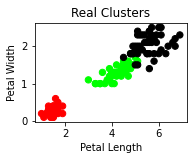

In [5]:
# Plot the Original Classifications using Petal features 

plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

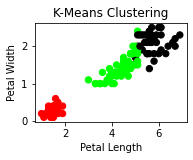

In [6]:
# Plot the Models Classifications 

plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

In [7]:
# General EM for GMM

from sklearn import preprocessing

# transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


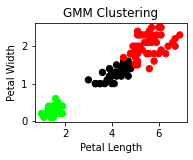

In [8]:
from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)
gmm_y = gmm.predict(xs)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')